In [2]:
from google.colab import files
uploaded = files.upload()


Saving orders.csv to orders.csv


LOAD THE CSV INTO DATAFRAME

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("orders.csv")
df.head()


,order_id,customer_id,order_date,delivery_date,status_description
0,1,6,2025-07-19,2025-07-23,Courier not assigned
1,2,4,2025-07-18,2025-07-24,Wrong address
2,3,7,2025-07-20,2025-07-23,On time
3,4,1,2025-07-19,2025-07-28,Wrong address
4,5,7,2025-07-12,2025-07-18,Delayed due to rain


CLEAN AND PREPROCESS THE DATA

In [5]:
# Convert delivery_date to datetime
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

# Calculate delivery delay (in days)
df['delay_days'] = (pd.Timestamp.today() - df['delivery_date']).dt.days

# Mark as delayed (1 if delay_days > 0)
df['delayed'] = np.where(df['delay_days'] > 0, 1, 0)


ANALYZE THE DATA

In [7]:
print("Total Delayed Orders by Customer:")
print(df.groupby('customer_id')['delayed'].sum().sort_values(ascending=False))


Total Delayed Orders by Customer:
customer_id
10    4
9     3
3     3
4     3
1     2
7     2
2     1
6     1
8     1
Name: delayed, dtype: int64


In [8]:
print("\nMost Common Delivery Issues (for delayed orders):")
print(df[df['delayed'] == 1]['status_description'].value_counts())



Most Common Delivery Issues (for delayed orders):
status_description
Wrong address           4
Delayed due to rain     4
Courier not assigned    3
On time                 3
Packaging delay         3
Logistics issue         2
Vehicle breakdown       1
Name: count, dtype: int64


SAVE THE DATA

In [9]:
df.to_csv("processed_orders.csv", index=False)
from google.colab import files
files.download("processed_orders.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

piechart:common delivery issues

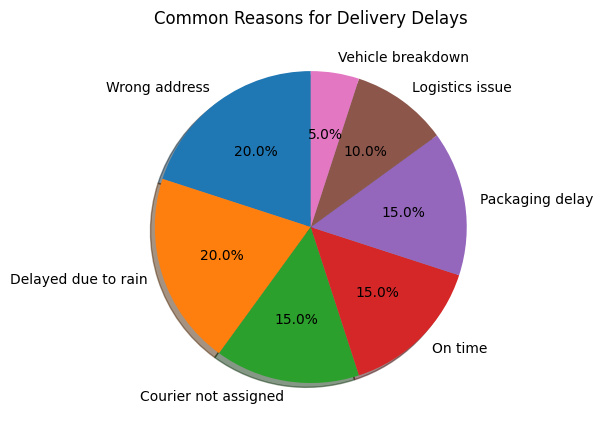

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
# Count common delay issues
delay_reasons = df[df['delayed'] == 1]['status_description'].value_counts()

# Plot
plt.figure(figsize=(6,6))
delay_reasons.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Common Reasons for Delivery Delays")
plt.ylabel("")  # Hide y-label
plt.tight_layout()
plt.show()


Line chart: Delays over Time

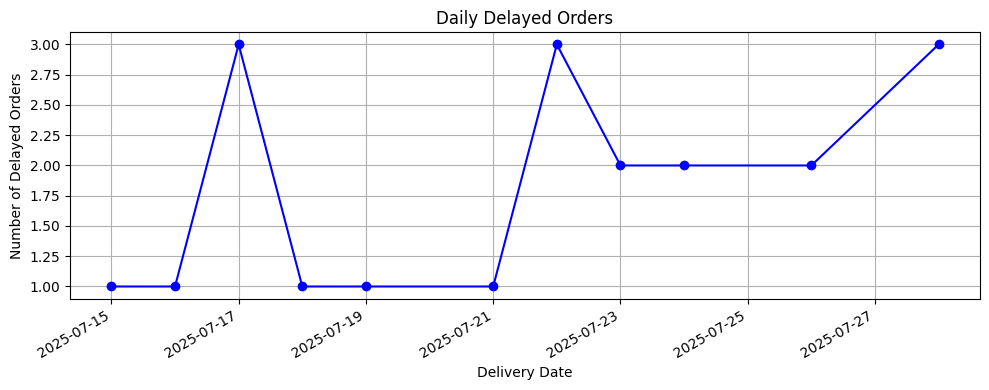

In [13]:
daily_delay = df.groupby('delivery_date')['delayed'].sum()
plt.figure(figsize=(10,4))
daily_delay.plot(marker='o', linestyle='-', color='blue')
plt.title("Daily Delayed Orders")
plt.xlabel("Delivery Date")
plt.ylabel("Number of Delayed Orders")
plt.grid(True)
plt.tight_layout()
plt.show()
